In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import random
from scipy.stats import norm
from utilities import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In [6]:
# init parameters, same for question 1 and 2
m = 2000
d = 2000
s = d/100
beta = 2
iterations = 100*d

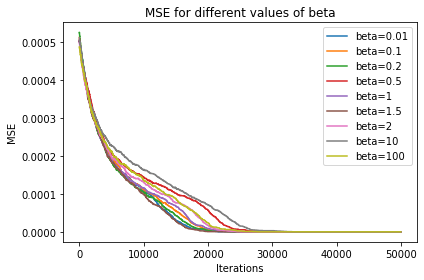

In [29]:
# TODO: implement early stopping, less betas, on average which works better? 
# for different values of beta computes the losses of the samples as we moove through the chain

plt.plot(get_sampling_losses(iterations, 0.01, m, d), label = 'beta=0.01')
plt.plot(get_sampling_losses(iterations, 0.1, m, d), label = 'beta=0.1')
plt.plot(get_sampling_losses(iterations, 0.2, m, d), label = 'beta=0.2')
plt.plot(get_sampling_losses(iterations, 0.5, m, d), label = 'beta=0.5')
plt.plot(get_sampling_losses(iterations, 1, m, d), label = 'beta=1')
plt.plot(get_sampling_losses(iterations, 1.5, m, d), label = 'beta=1.5')
plt.plot(get_sampling_losses(iterations, 2, m, d), label = 'beta=2')
plt.plot(get_sampling_losses(iterations, 10, m, d), label = 'beta=10')
plt.plot(get_sampling_losses(iterations, 100, m, d), label = 'beta=100')

plt.legend()
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.title('MSE for different values of beta')
plt.tight_layout()

plt.savefig('MSE_diferent_beta.jpg')
plt.show()

In [8]:
# different strategies of simulation annealing (linear, geometric..)
# test simulation annealing
plt.plot(get_simulation_annealing_losses(iterations, 0.1, m, d, math.floor(iterations/20), lambda x : x * 1.1))
plt.plot(get_simulation_annealing_losses(iterations, 0.1, m, d, math.floor(iterations/20), lambda x : x * 1.3))
plt.plot(get_simulation_annealing_losses(iterations, 0.1, m, d, math.floor(iterations/20), lambda x : x * 2))

plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.title('MSE of simulation annealing at different iterations')
plt.tight_layout()

plt.savefig('MSE_simulation_annealing.jpg')

/home/stefano/Documents/EPFL/projects/MC_project/utilities.py:107: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-beta * (noise(X, y, theta1) - noise(X, y, theta)))


KeyboardInterrupt: 

In [7]:
# TODO rerurn with full iterations
# don't rerun as it will take a while

# increase the number of samples (m) to find minimum number of samples to 
losses_with_different_m = []
m_values = np.arange(250,4500, 250)

for m_value in  m_values: 
    # for the different values of m only save the last loss (after doing all the iterations)
    print(f'running MC for m={m_value}', end='\r')
    losses_with_different_m.append(get_sampling_losses(iterations, 0.5, m_value, d)[-1])


plt.plot(m_values, losses_with_different_m) # always changes
plt.ylabel('MSE')
plt.xlabel('Number of samples over dimensions (m/d)')
plt.title('MSE with different number of samples m')
plt.tight_layout()

plt.savefig('q1_ex6_minimum_m_to_recover.jpg')


/home/stefano/Documents/EPFL/projects/MC_project/utilities.py:80: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-beta * (noise(X, y, theta1) - noise(X, y, theta)))


KeyboardInterrupt: 

# Qeustions 2 

In [22]:
plt.plot(get_sampling_losses_fixed_ones(iterations, 1, 100, d, s))
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.tight_layout()

plt.savefig('MSE_fixed_ones.jpg')

KeyboardInterrupt: 

In [5]:
# run multiple times and take the average

losses_with_different_m1 = []
m_values = np.arange(10, 250, 10)
for m_value in  m_values: 
    print(f'running MC for m={m_value}', end='\r')
    losses_with_different_m1.append(get_sampling_losses_fixed_ones(iterations, 0.1, m_value, d, s)[-1])

plt.plot(m_values , losses_with_different_m1) 

plt.ylabel('MSE')
plt.xlabel('Number of samples over dimensions (m/d)')
plt.title('MSE with different number of samples m')
plt.tight_layout()

plt.savefig('q2_ex6_minimum_m_to_recover.jpg')

KeyboardInterrupt: 

# Question 3

/var/folders/pw/_lszqphd0sj2lsl8tyw057lc0000gn/T/ipykernel_63723/500220195.py:17: RuntimeWarning: divide by zero encountered in log
  return -(np.log(alpha[ones_indices]).sum() + np.log(1 - alpha[min_one_indices]).sum())
/var/folders/pw/_lszqphd0sj2lsl8tyw057lc0000gn/T/ipykernel_63723/500220195.py:44: RuntimeWarning: invalid value encountered in scalar subtract
  comp = np.exp(-beta * (log_likelihood(X, y, theta1) - log_likelihood(X, y, theta)))


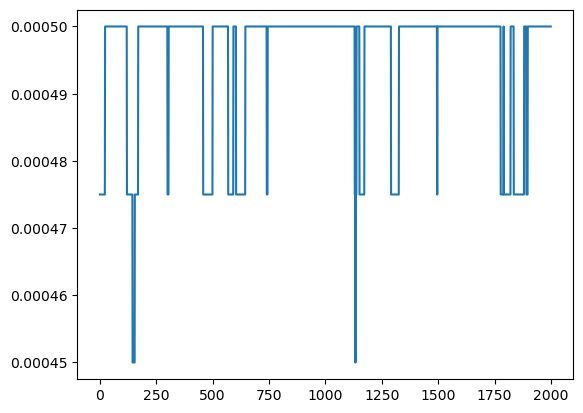

In [166]:
m3 = 100
d3 = 500
s3 = d3/100
#beta = 2
iterations3 = 100*d3

loss = get_sampling_losses_sign(iterations3, 1, m3, d3, s3)
plt.plot(loss)

In [ ]:
losses_with_different_m1 = []
m_values = np.arange(1, 120, 10)
for m_value in m_values: 
    print(f'running MC for m={m_value}', end='\r')
    losses_with_different_m1.append(get_sampling_losses_sign(iterations, 5, m_value, d, s)[-1])

plt.plot(m_values, losses_with_different_m1) 

plt.ylabel('MSE')
plt.xlabel('Number of samples over dimensions (m)')
plt.title('MSE with different number of samples m')
plt.tight_layout()

plt.savefig('q3_ex3_minimum_m_to_recover.jpg')